# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

One

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score


In [2]:
df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].astype('category')


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

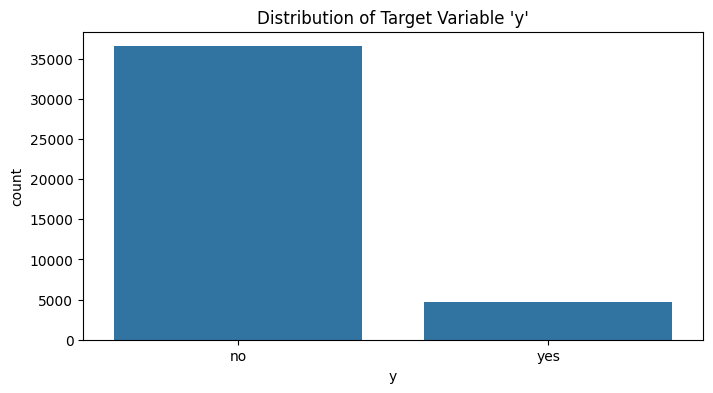

y
no     36548
yes     4640
Name: count, dtype: int64

In [6]:
# Analyzing the distribution of the target variable 'y'
target_distribution = df['y'].value_counts()

# Plotting the distribution of the target variable
plt.figure(figsize=(8, 4))
sns.countplot(x='y', data=df)
plt.title("Distribution of Target Variable 'y'")
plt.show()

target_distribution

/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


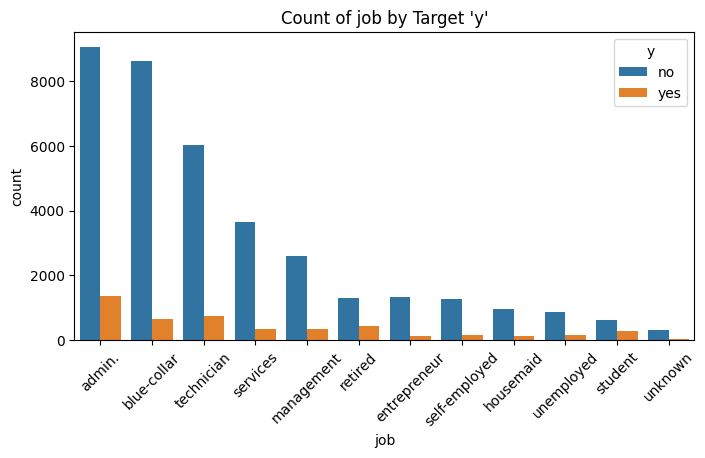

/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


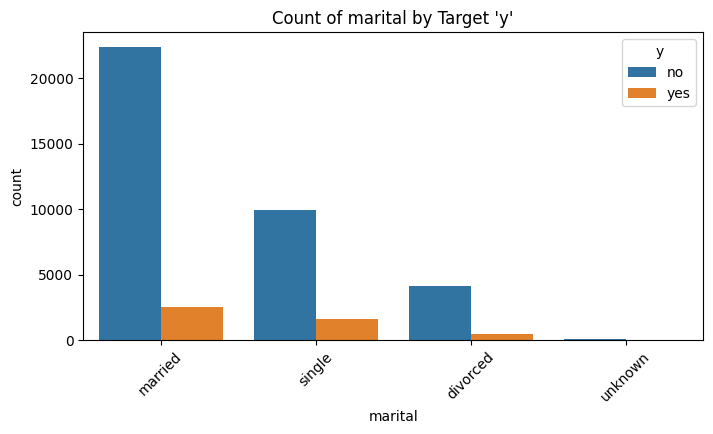

/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


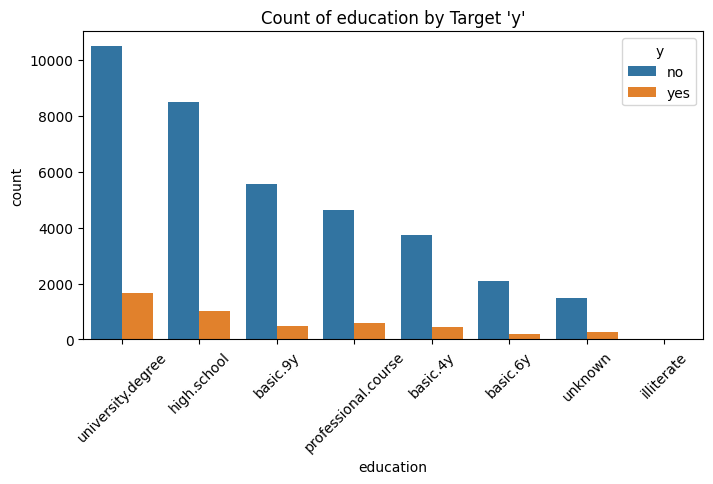

/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


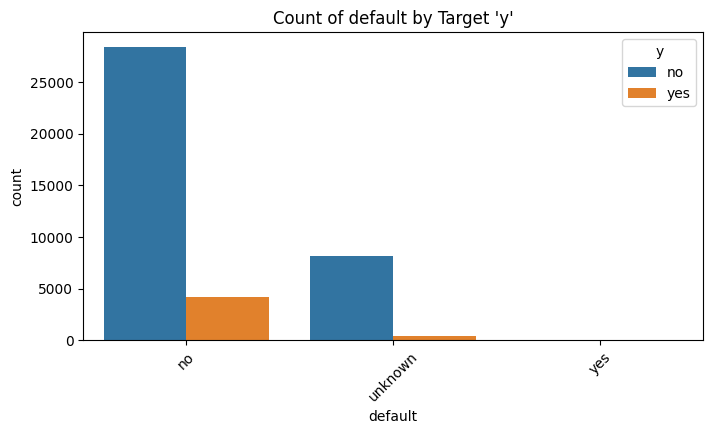

/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


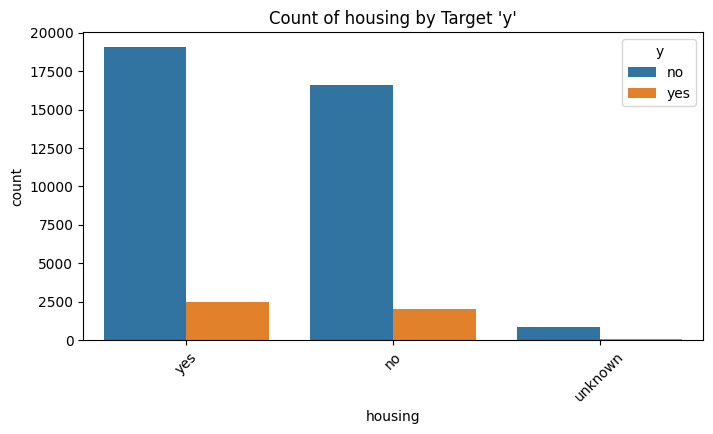

/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


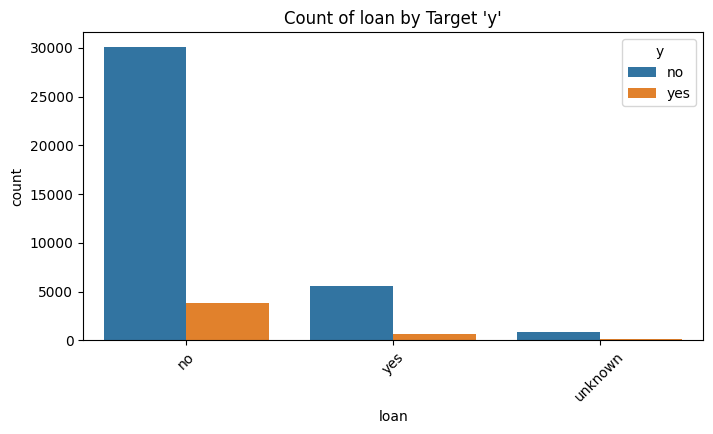

/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


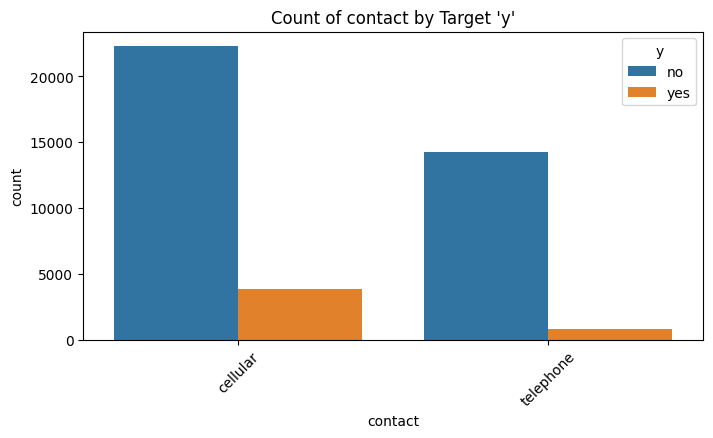

/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


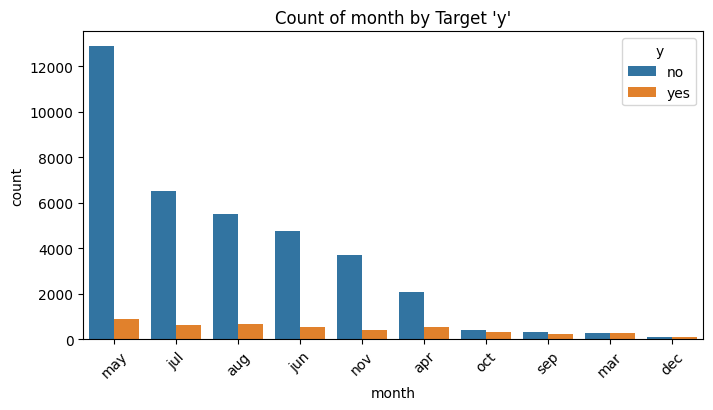

/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


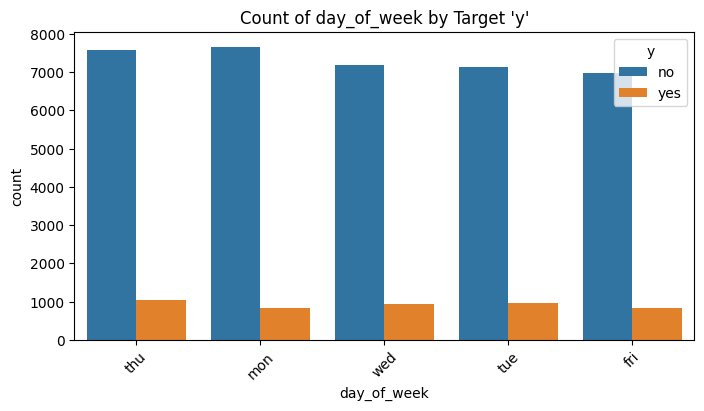

/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


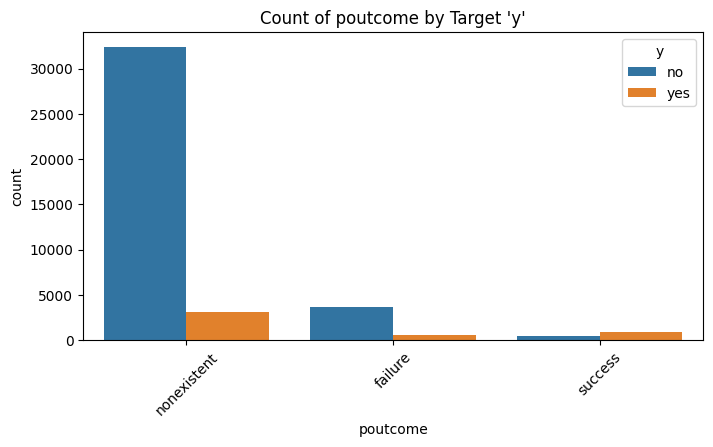

In [7]:
# Selecting categorical columns
categorical_columns = df.select_dtypes(include=['category']).columns
categorical_columns = categorical_columns.drop('y')  # Exclude the target variable

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='y', data=df, order=df[col].value_counts().index)
    plt.title(f"Count of {col} by Target 'y'")
    plt.xticks(rotation=45)
    plt.show()


In [8]:
# Counting the number of 'unknown' values in the categorical columns
unknown_counts = df[categorical_columns].apply(lambda x: (x == 'unknown').sum())
unknown_counts


job             330
marital          80
education      1731
default        8597
housing         990
loan            990
contact           0
month             0
day_of_week       0
poutcome          0
dtype: int64

Observation: The below categorical columns have significant 'unknown' values:

education: 1731 'unknown' values
default: 8597 'unknown' values
housing: 990 'unknown' values
loan: 990 'unknown' values

Now need to impute using mode


In [9]:
# Performing mode imputation for each column
for column in ['education', 'default', 'housing', 'loan','job','marital']:
    mode_value = df[column].mode()[0]    
    df[column] = df[column].apply(lambda x: mode_value if x == 'unknown' else x)


# Verifying the imputation by counting 'unknown' values again
post_imputation_counts = df[['education', 'default', 'housing', 'loan']].apply(lambda x: (x == 'unknown').sum())
post_imputation_counts

education    0
default      0
housing      0
loan         0
dtype: int64

/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


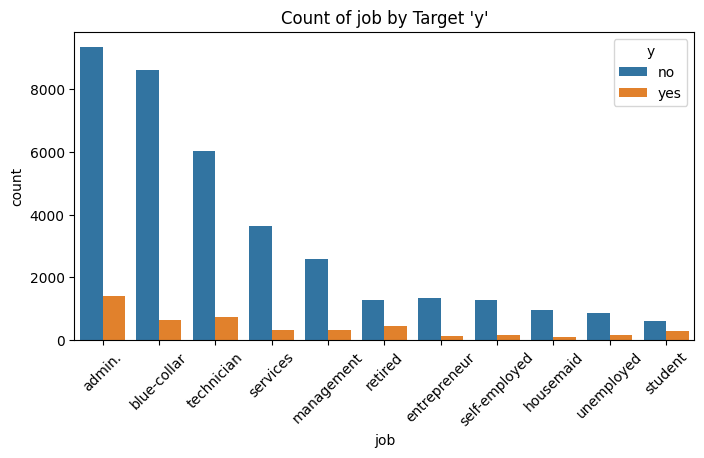

/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


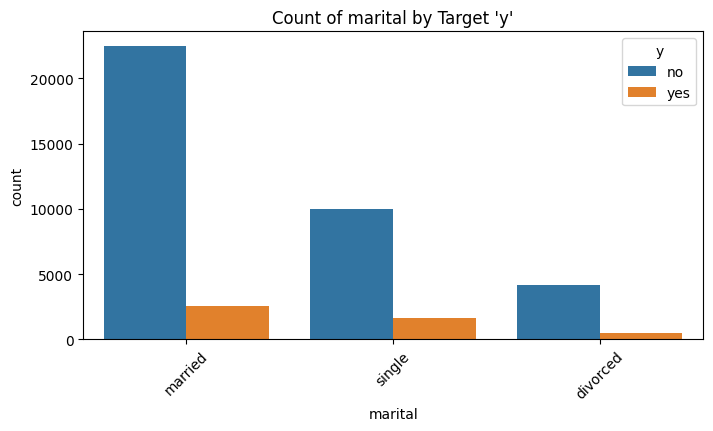

/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


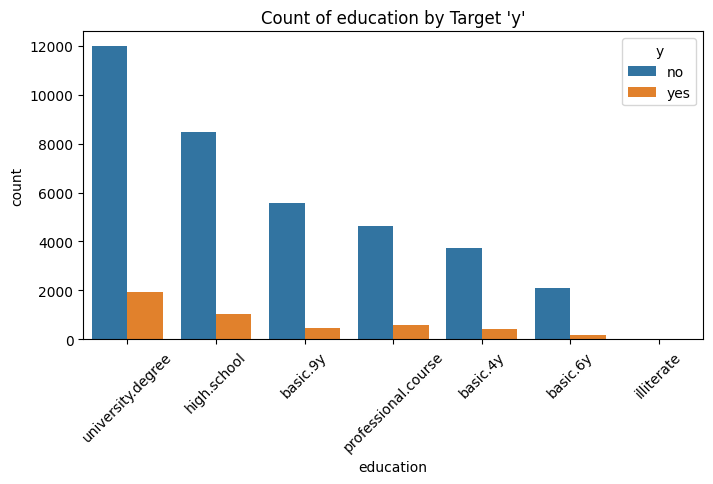

/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


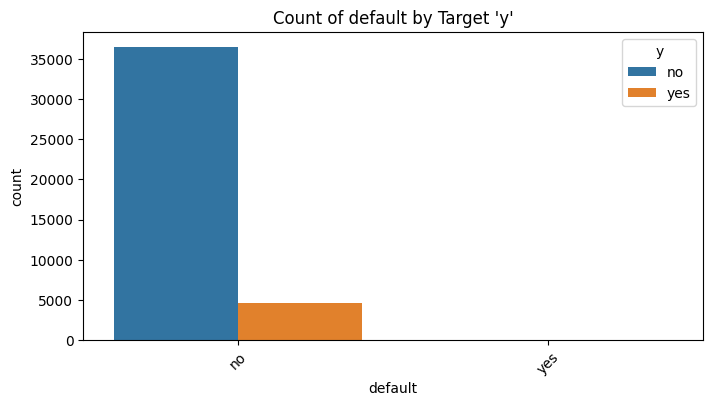

/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


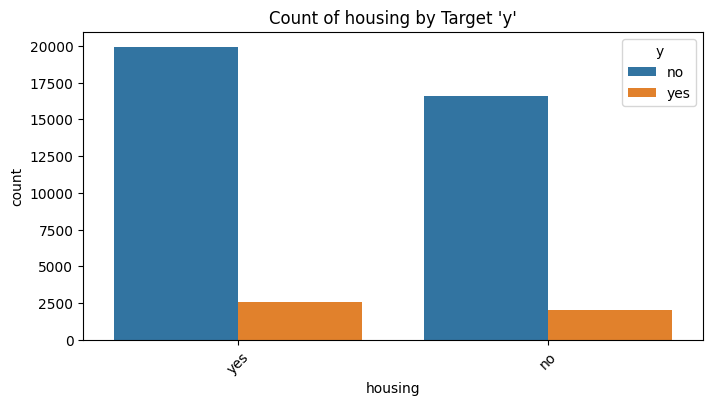

/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


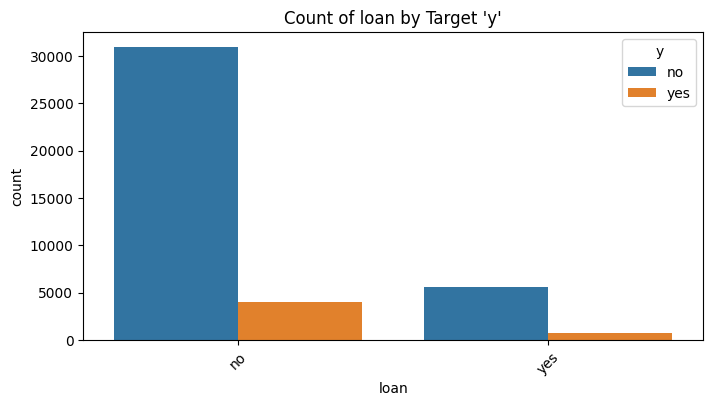

/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


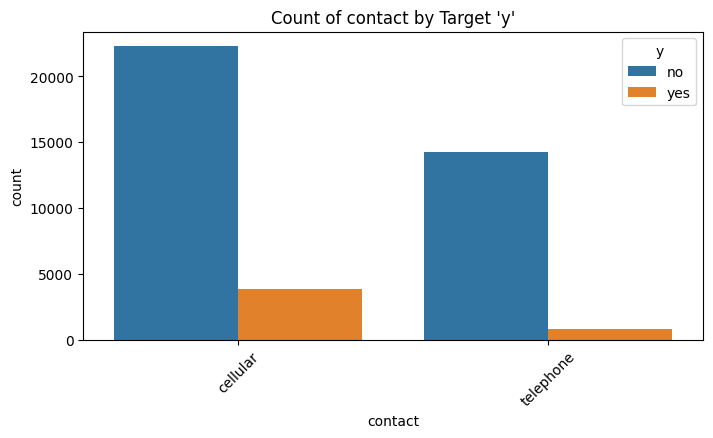

/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


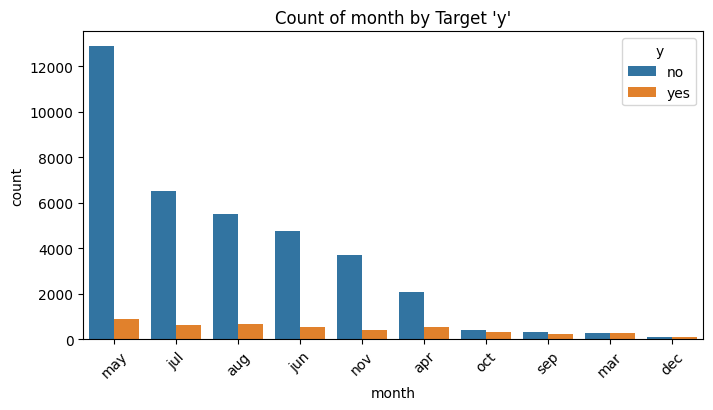

/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


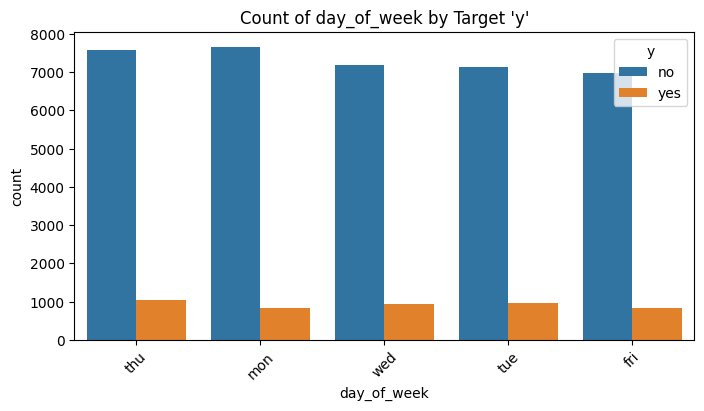

/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/abhinavdagur/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


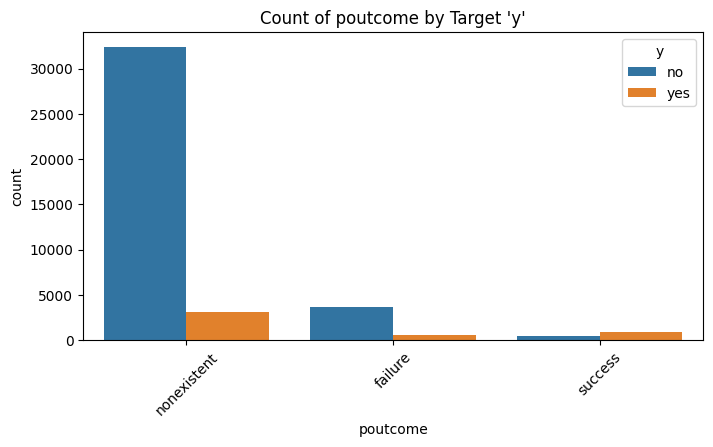

In [10]:
#Now plot the categorical again

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='y', data=df, order=df[col].value_counts().index)
    plt.title(f"Count of {col} by Target 'y'")
    plt.xticks(rotation=45)
    plt.show()


#### Now find out columns which has only two or three unique values to apply Ordinal Category


In [11]:
pd.set_option('display.max_columns', None)


df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,no,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,university.degree,no,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [12]:
columns_with_2_or_3_values = df.nunique().loc[lambda x: x.isin([2, 3])]

#columns_with_2_or_3_values

unique_values = {col: df[col].unique() for col in columns_with_2_or_3_values.index}

unique_values

{'marital': array(['married', 'single', 'divorced'], dtype=object),
 'default': array(['no', 'yes'], dtype=object),
 'housing': array(['no', 'yes'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': ['telephone', 'cellular']
 Categories (2, object): ['cellular', 'telephone'],
 'poutcome': ['nonexistent', 'failure', 'success']
 Categories (3, object): ['failure', 'nonexistent', 'success'],
 'y': ['no', 'yes']
 Categories (2, object): ['no', 'yes']}

In [13]:
mappings = {
    'marital': {'single': 0, 'married': 1, 'divorced': 2},
    'default': {'no': 0, 'yes': 1},
    'housing': {'no': 0, 'yes': 1},
    'loan': {'no': 0, 'yes': 1},
    'y': {'no': 0, 'yes': 1},    
    'contact': {'telephone': 0, 'cellular': 1},
    'poutcome': {'nonexistent': 0, 'failure': 1, 'success': 2}
}

# Applying the mappings to the dataset
for column, mapping in mappings.items():
    df[column] = df[column].map(mapping)

# Displaying the first few rows to verify the changes
pd.set_option('display.max_columns', None)


df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,1,basic.4y,0,0,0,0,may,mon,261,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,1,high.school,0,0,0,0,may,mon,149,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,1,high.school,0,1,0,0,may,mon,226,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,1,basic.6y,0,0,0,0,may,mon,151,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,1,high.school,0,0,1,0,may,mon,307,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
5,45,services,1,basic.9y,0,0,0,0,may,mon,198,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,1,professional.course,0,0,0,0,may,mon,139,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
7,41,blue-collar,1,university.degree,0,0,0,0,may,mon,217,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
8,24,technician,0,professional.course,0,1,0,0,may,mon,380,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
9,25,services,0,high.school,0,1,0,0,may,mon,50,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [14]:
nan_check = df.isna().any()
nan_check


age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [15]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,1,basic.4y,0,0,0,0,may,mon,261,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,1,high.school,0,0,0,0,may,mon,149,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,1,high.school,0,1,0,0,may,mon,226,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,1,basic.6y,0,0,0,0,may,mon,151,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,1,high.school,0,0,1,0,may,mon,307,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
5,45,services,1,basic.9y,0,0,0,0,may,mon,198,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,1,professional.course,0,0,0,0,may,mon,139,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
7,41,blue-collar,1,university.degree,0,0,0,0,may,mon,217,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
8,24,technician,0,professional.course,0,1,0,0,may,mon,380,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
9,25,services,0,high.school,0,1,0,0,may,mon,50,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [16]:
#From the above we can see the remaining categorical features are :
remaining_categorical_features = ['job', 'education', 'month', 'day_of_week']

In [17]:
# Numerical Data Summary
numerical_summary = df.select_dtypes(include=['number']).describe()
numerical_summary

,age,marital,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,0.831116,0.000073,0.547878,0.151695,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,0.603589,0.008534,0.497708,0.358729,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,0.000000,0.000000,0.000000,0.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,1.000000,0.000000,1.000000,0.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,1.000000,0.000000,1.000000,0.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,2.000000,1.000000,1.000000,1.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [18]:
# Create X, y dataframes
X = df.drop(['y'], axis = 1)
y = df['y']

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [19]:
# Splitting the data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Checking the shape of the resulting datasets
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((30891, 20), (10297, 20), (30891,), (10297,))

In [20]:
remaining_categorical_features

['job', 'education', 'month', 'day_of_week']

In [21]:
# OneHotEncoding the categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), remaining_categorical_features)
    ],
    remainder=StandardScaler()
)    


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [22]:
model_summary = pd.DataFrame(columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])


model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=1000))])

# Training the model
start_time = time.time()
model.fit(X_train, y_train)
train_time = time.time() - start_time

# Evaluating the model
train_accuracy = accuracy_score(y_train, model.predict(X_train)) * 100
test_accuracy = accuracy_score(y_test, model.predict(X_test))* 100

# Creating a summary table
model_summary = pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Train Time': [train_time],
    'Train Accuracy': [train_accuracy],
    'Test Accuracy': [test_accuracy]
})

model_summary

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.433853,91.045936,91.065359


### Problem 8: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [23]:
classifiers = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC()
}

In [24]:
for model_name, classifier in classifiers.items():
    # Creating a pipeline with OneHotEncoder and the current classifier
    model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', classifier)])
    
    # Training the model
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Evaluating the model
    train_accuracy = accuracy_score(y_train, model.predict(X_train)) * 100
    test_accuracy = accuracy_score(y_test, model.predict(X_test)) * 100

     # Appending the results to the summary DataFrame using concat
    model_results = pd.DataFrame({
        'Model': [model_name],
        'Train Time': [train_time],
        'Train Accuracy': [train_accuracy],
        'Test Accuracy': [test_accuracy]
    })
    model_summary = pd.concat([model_summary, model_results], ignore_index=True)

model_summary

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.433853,91.045936,91.065359
1,K-Nearest Neighbors,0.038135,92.661293,90.142760
2,Decision Tree,0.152198,100.000000,88.647179
3,Support Vector Machine,6.733927,92.153054,91.211032


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [25]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
549,50,blue-collar,1,basic.4y,0,1,0,0,may,tue,153,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
1974,26,blue-collar,0,high.school,0,0,0,0,may,fri,213,4,999,0,0,1.1,93.994,-36.4,4.855,5191.0
20992,34,technician,1,high.school,0,1,0,1,aug,thu,85,3,999,0,0,1.4,93.444,-36.1,4.964,5228.1
1730,30,blue-collar,0,basic.9y,0,1,0,0,may,fri,322,1,999,0,0,1.1,93.994,-36.4,4.855,5191.0
26913,29,admin.,0,university.degree,0,1,0,1,nov,thu,341,2,999,0,0,-0.1,93.200,-42.0,4.076,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,58,retired,1,professional.course,0,0,0,0,may,tue,427,2,999,0,0,1.1,93.994,-36.4,4.857,5191.0
11284,37,management,1,university.degree,0,0,0,0,jun,thu,288,1,999,0,0,1.4,94.465,-41.8,4.961,5228.1
38158,35,admin.,1,high.school,0,1,0,1,oct,thu,194,1,4,1,2,-3.4,92.431,-26.9,0.754,5017.5
860,40,management,1,university.degree,0,1,0,0,may,wed,295,2,999,0,0,1.1,93.994,-36.4,4.856,5191.0


In [26]:
tuned_model_summary = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy', 'Test Precision','Test Recall','Training Score','Test Score','Training Fit Time','ROC AUC Score','Best Parameters'])


In [27]:
pd.set_option('display.max_colwidth', None) 

In [28]:
# Setting up the hyperparameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}


X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Creating the Logistic Regression model
logreg = LogisticRegression(solver='liblinear', max_iter=1000)

# Setting up GridSearchCV
grid_search_lr = GridSearchCV(logreg, param_grid_lr, scoring='accuracy')

# Timing the training process
start_time = time.time()
grid_search_lr.fit(X_train_transformed, y_train)
training_time = time.time() - start_time

# Best parameters
best_params = grid_search_lr.best_params_

# Predicting on test set
y_pred = grid_search_lr.predict(X_test_transformed)

# Calculating metrics
train_accuracy = grid_search_lr.best_score_
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_roc_auc = roc_auc_score(y_test, y_pred)

# Storing results
tuned_model_summary = pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Train Accuracy': [train_accuracy],
    'Test Accuracy': [test_accuracy],
    'Test Precision': [test_precision],
    'Test Recall': [test_recall],
    'Training Score': [grid_search_lr.score(X_train_transformed, y_train)],
    'Test Score': [grid_search_lr.score(X_test_transformed, y_test)],
    'Training Fit Time': [training_time],
    'ROC AUC Score': [test_roc_auc],
    'Best Parameters': [best_params]
})

tuned_model_summary



,Model,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Training Score,Test Score,Training Fit Time,ROC AUC Score,Best Parameters
0,Logistic Regression,0.910233,0.910459,0.657143,0.418907,0.910395,0.910459,47.790208,0.695674,"{'C': 1, 'penalty': 'l2'}"


In [29]:
# Create Transformer object
transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), remaining_categorical_features),
                                      remainder = StandardScaler())

In [30]:
# Setting up the hyperparameter grid for KNN


knn = Pipeline([('transformer', transformer), ('knn', KNeighborsClassifier())])

param_grid_knn = {
    'knn__n_neighbors': [1, 100, 2]
}
# Setting up GridSearchCV for KNN
start_time = time.time()
grid_search_knn = GridSearchCV(knn, param_grid_knn)
grid_search_knn.fit(X_train, y_train)
training_time = time.time() - start_time

# Best parameters
best_params = grid_search_knn.best_params_

# Predicting on test set
y_pred = grid_search_knn.predict(X_test)

# Calculating metrics
train_accuracy = grid_search_knn.best_score_
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_roc_auc = roc_auc_score(y_test, y_pred)
    

# Storing results
model_results = pd.DataFrame({
    'Model': ['K-Nearest Neighbors'],
    'Train Accuracy': [train_accuracy],
    'Test Accuracy': [test_accuracy],
    'Test Precision': [test_precision],
    'Test Recall': [test_recall],
    'Training Score': [grid_search_knn.score(X_train, y_train)],
    'Test Score': [grid_search_knn.score(X_test, y_test)],
    'Training Fit Time': [training_time],
    'ROC AUC Score': [test_roc_auc],
    'Best Parameters': [best_params],
})
tuned_model_summary = pd.concat([tuned_model_summary, model_results], ignore_index=True)

tuned_model_summary

,Model,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Training Score,Test Score,Training Fit Time,ROC AUC Score,Best Parameters
0,Logistic Regression,0.910233,0.910459,0.657143,0.418907,0.910395,0.910459,47.790208,0.695674,"{'C': 1, 'penalty': 'l2'}"
1,K-Nearest Neighbors,0.903758,0.905409,0.673786,0.300954,0.904989,0.905409,3.734143,0.641291,{'knn__n_neighbors': 100}


In [31]:
decision_pipeline = Pipeline([('transformer', transformer), ('dtree', DecisionTreeClassifier())])

param_grid_dt = {
    'dtree__max_depth': range(1, 20, 2),
    'dtree__min_samples_split': [2, 5, 10],
    'dtree__min_samples_leaf': [1,2,3]
}

# Setting up GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(decision_pipeline, param_grid_dt)

dtr_grid_start = time.time()
grid_search_dt.fit(X_train, y_train)

grid_search_dt.fit(X_train, y_train)
training_time = time.time() - start_time

# Best parameters
best_params = grid_search_dt.best_params_

# Predicting on test set
y_pred = grid_search_dt.predict(X_test)

# Calculating metrics
train_accuracy = grid_search_dt.best_score_
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_roc_auc = roc_auc_score(y_test, y_pred)

# Storing results
model_results = pd.DataFrame({
    'Model': ['Decision Tree'],
    'Train Accuracy': [train_accuracy],
    'Test Accuracy': [test_accuracy],
    'Test Precision': [test_precision],
    'Test Recall': [test_recall],
    'Training Score': [grid_search_dt.score(X_train, y_train)],
    'Test Score': [grid_search_dt.score(X_test, y_test)],
    'Training Fit Time': [training_time],
    'ROC AUC Score': [test_roc_auc],
    'Best Parameters': [best_params],
})
tuned_model_summary = pd.concat([tuned_model_summary, model_results], ignore_index=True)

tuned_model_summary

,Model,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Training Score,Test Score,Training Fit Time,ROC AUC Score,Best Parameters
0,Logistic Regression,0.910233,0.910459,0.657143,0.418907,0.910395,0.910459,47.790208,0.695674,"{'C': 1, 'penalty': 'l2'}"
1,K-Nearest Neighbors,0.903758,0.905409,0.673786,0.300954,0.904989,0.905409,3.734143,0.641291,{'knn__n_neighbors': 100}
2,Decision Tree,0.913049,0.914830,0.650327,0.517780,0.917128,0.914830,83.868338,0.741337,"{'dtree__max_depth': 5, 'dtree__min_samples_leaf': 3, 'dtree__min_samples_split': 2}"


In [ ]:
# Creating the svc pipeline

svc_model = Pipeline([('transformer', transformer), ('svc', SVC())])

param_grid_svc = {'svc__kernel': ['rbf'],
              'svc__gamma': [0.1,1.0]}

# Setting up GridSearchCV for Decision Tree
grid_search_svc = GridSearchCV(svc_model, param_grid_svc)

svc_grid_start = time.time()
grid_search_svc.fit(X_train, y_train)

grid_search_svc.fit(X_train, y_train)
training_time = time.time() - start_time

# Best parameters
best_params = grid_search_svc.best_params_

# Predicting on test set
y_pred = grid_search_svc.predict(X_test)

# Calculating metrics
train_accuracy = grid_search_dt.best_score_
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_roc_auc = roc_auc_score(y_test, y_pred)

# Storing results
model_results = pd.DataFrame({
    'Model': ['Support Vector Machine'],
    'Train Accuracy': [train_accuracy],
    'Test Accuracy': [test_accuracy],
    'Test Precision': [test_precision],
    'Test Recall': [test_recall],
    'Training Score': [grid_search_svc.score(X_train, y_train)],
    'Test Score': [grid_search_svc.score(X_test, y_test)],
    'Training Fit Time': [training_time],
    'ROC AUC Score': [test_roc_auc],
    'Best Parameters': [best_params],
})
tuned_model_summary = pd.concat([tuned_model_summary, model_results], ignore_index=True)

tuned_model_summary


##### Questions